# TP1 du module 4 : le travail sur les données.

Dans ce TP, nous allons explorer plus en détails le jeu de données du Titanic. Objectifs :
* Analyser des statistiques pour décrire les données
* Produire des visualisations pertinentes pour la compréhesion des données.
* Nettoyer le jeu de données
* Préparer les données pour qu'elles soient prêtes à être fournies à un algorithme d'apprentissage.

In [5]:
# Ajoutez ici les imports de librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Commencez par recharger le jeu de données depuis un csv dans un dataframe Pandas. Rappel de l'adresse à laquelle vous pouvez le trouver : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [6]:
url= "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic=pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploration du jeu de données

Commencez par répondre au question suivante. Prenez le temps de bien analyser vos réponses, afin de mieux vous familiariser avec le contenu du jeu de données.

1. Combien de données dans le jeu de données Titanic ?

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Combien d'attributs compte le jeu de données ?

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. Identifiez quelles colonnes contiennent des données discrètes, et lesquelles contiennent des données continues.

In [13]:
titanic.dtypes #verifie le types de colonnes
titanic.select_dtypes(include='object') # detection auto des colonnes catégorielles
titanic.select_dtypes(include=['int64', 'float64']) # detection auto des colonnes numériques

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


4. De la même manière, identifiez les colonnes de données qualitatives, et celles de données quantitatives.

In [15]:
qualitatives = titanic.select_dtypes(include=['object', 'category'])
quantitatives = titanic.select_dtypes(include=['int64', 'float64'])

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


5. Affichez les statistiques de base sur les colonnes quantitatives du dataset. 
Quelles informations pouvez-vous en retirer ? Pour chaque attribut, cherchez au moins une information pertinente que vous pouvez déduire de vos observations.

In [26]:
quantitatives = titanic.select_dtypes(include=['int64', 'float64'])
quantitatives.info()
# il manque des données pour l'attribut 'Age'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


6. Sur une figure avec 6 sous-figures, proposez un histogramme pour visualiser la répartition des valeurs sur les attributs suivants : Survived, Pclass, Sex, Embarked, Age, Fare. Pour chaque figure, quelle(s) observation(s) pouvez-vous faire ?

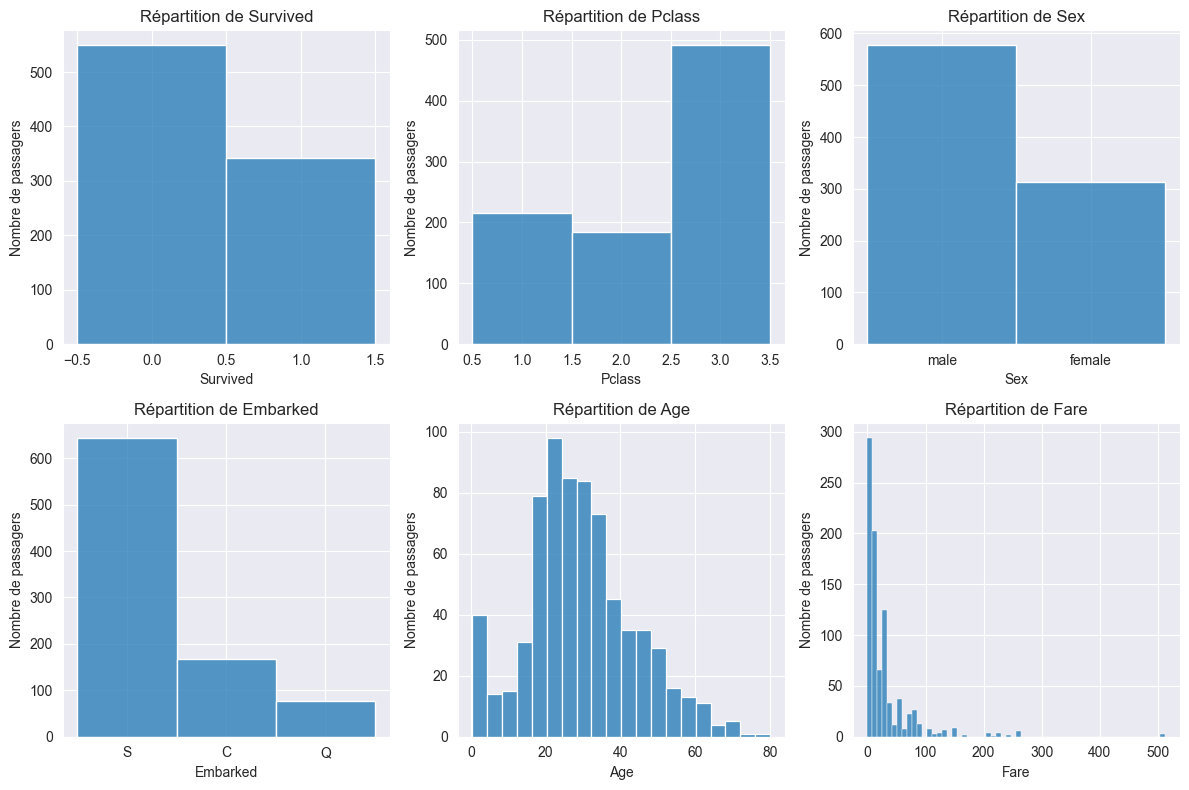

In [28]:
# Colonnes à visualiser
cols = ['Survived','Pclass','Sex','Embarked','Age','Fare']

fig, axes = plt.subplots(2, 3, figsize=(12,8))

for i, column in enumerate(cols):
    sns.histplot(
        data=titanic,
        x=column,
        ax=axes[i//3, i%3],
        discrete=(titanic[column].dtype == 'object' or column in ['Survived','Pclass','Sex','Embarked'])
    )
    axes[i//3, i%3].set_title(f"Répartition de {column}")
    axes[i//3, i%3].set_xlabel(column)
    axes[i//3, i%3].set_ylabel("Nombre de passagers")

plt.tight_layout()
plt.show()

7. Sur un même graphique, représentez, pour chaque genre, le nombre de personnes ayant survécu. Que pouvez-vous en déduire ? Le genre d'un passager vous parait-il pertinent pour qu'un modèle d'apprentissage puisse prédire si ce passager a survécu ?

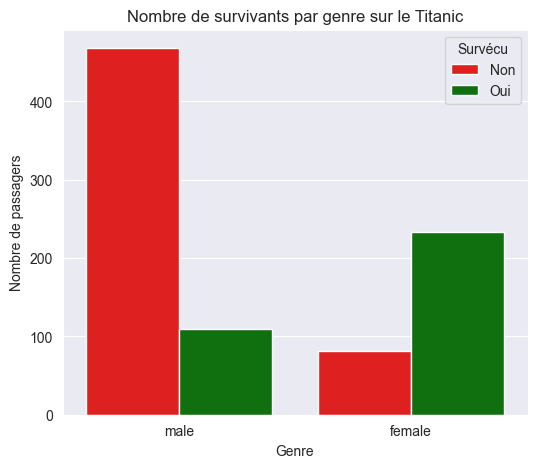

In [32]:

plt.figure(figsize=(6,5))

sns.countplot(
    data=titanic,
    x="Sex",          # genre en abscisse
    hue="Survived",   # couleur selon survie
    palette={0:"red", 1:"green"}
)

plt.xlabel("Genre")
plt.ylabel("Nombre de passagers")
plt.title("Nombre de survivants par genre sur le Titanic")
plt.legend(title="Survécu", labels=["Non", "Oui"])

plt.show()


8. En vous basant sur une visualisation, observez-vous une corrélation entre certains attributs ? Que pouvez-vous en déduire pour un futur modèle d'apprentissage ?

In [ ]:
#Il y a une correlation entre le sexe et la survie

9. En vous basant sur vos observations de la visualisation précédente, confirmez vos impressions en proposant deux visualisations. Par exemple, si vous avez observé une corrélation entre un attribut A et un attribut B, mettez en valeur le fait que les mêmes valeurs de A sont souvent trouvées avec les mêmes valeurs de B. 

C:\Users\adjenid2025\AppData\Local\Temp\1\ipykernel_13496\4005728839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


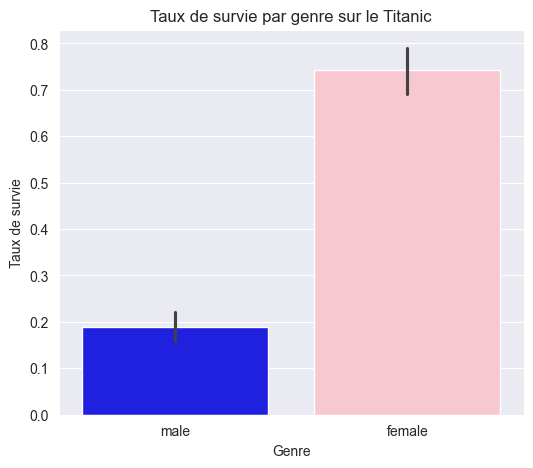

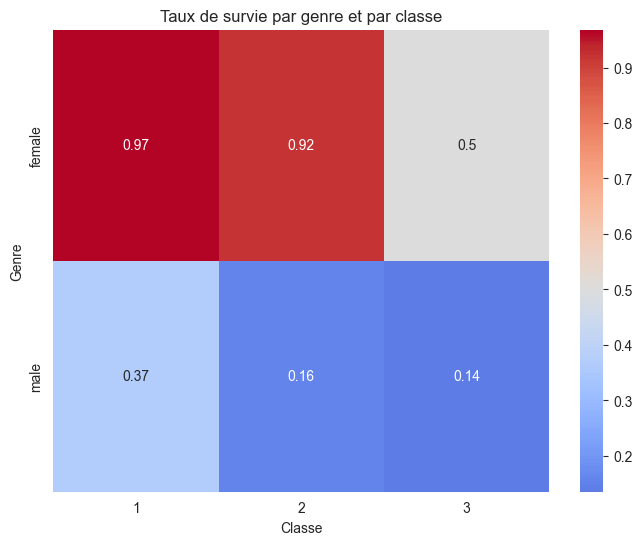

In [37]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=titanic,
    x="Sex",
    y="Survived",
    estimator=lambda x: sum(x)/len(x),  # taux de survie
    palette={"male":"blue","female":"pink"}
)

plt.xlabel("Genre")
plt.ylabel("Taux de survie")
plt.title("Taux de survie par genre sur le Titanic")
plt.show()


# Tableau croisé : survie par genre et classe
cross_tab = titanic.pivot_table(
    index="Sex",
    columns="Pclass",
    values="Survived",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(
    cross_tab,
    annot=True,
    cmap="coolwarm",
    center=0.5
)

plt.title("Taux de survie par genre et par classe")
plt.xlabel("Classe")
plt.ylabel("Genre")
plt.show()

10. Mettez-vous à présent dans le rôle d'un data analyst face à un nouveau jeu de données : quelles autres visualisations vous paraissent nécessaires ? Proposez au moins trois visualisations qui vous semblent pertinentes. Gardez en tête que l'objectif sur ce jeu de données sera de réussir à prédire si un passager à survécu ou non.

## Nettoyage des données
1. Pour chaque colonne, comptez le nombre de valeurs nulles.

### Traitement du port d'embarquement

2. Les valeurs manquantes du port d'embarquement sont très peu nombreuses. De plus, s'agissant d'un attribut discret, nous pouvons considérer l'information de valeur nulle comme une valeur possible supplémentaire. Commencer par affichez les lignes pour lesquelles le port d'embarquement n'est pas renseigné.

3. Remplacez ces valeurs nulles par la valeur 'U' (pour unknown). Vérifiez vos résultats en réaffichant les lignes obtenues ci-dessus :

### Traitement du numéro de cabine

4. Le numéro de cabine est l'attribut qui contient le plus de valeurs nulles. Cet attribut n'a pas de lien évident avec la survie des passagers. Supprimer cette colonne dans votre dataframe.

### Traitement de l'âge
5. L'âge est un attribut plus délicat à traiter : il contient un nombre conséquent de valeur nulle, mais il est très pertinent à prendre en compte pour la prédiction de la survie d'un passager, ces deux informations étant assez fortement corrélées. Il existe plein de stratégies pour remplacer ces valeurs manquantes :
* Mettre une valeur aléatoire '(tirée entre le min et le max)
* Remplacer par la moyenne
* Remplacer par une valeur déterminée en fonction des autres paramètres (classe, age, etc)

Commencer par calculer pour chaque genre et pour chaque classe, l'âge moyen (6 valeurs à obtenir au total).

6. Pour chaque ligne du jeu de données, si l'âge est manquant, remplacez la valeur nulle par une des valeurs calculées ci-dessus. basez-vous sur le genre et la classe du passager pour choisir la bonne valeur. 

## Préparer les données

Nous entrons dans la dernière phase de traitement des données : nous allons terminer des les mettre en forme, pour qu'elles soient prêtes à être manipulées dans un processus d'apprentissage.

# Encodage des données catégorielles

1. Réaffichez les infos sur le jeu de données. Vous devez avoir 11 colonnes, toutes remplies avec 891 valeurs.

2. Trois colonnes sont liées à l'identification unique d'un passager, et ne sont pas pertinentes pour la prédiction de la survie. Supprimez ces trois colonnes de votre jeu de données.

3. Reproduisez une manipulation vue au module 3 : combinez deux colonnes relatives aux familles de passagers pour n'en faire plus qu'une. Pensez à supprimer les deux anciennes colonnes.

4. Parmi les colonnes restantes, sur lesquelles un encodage one-hot vous semble pertinent ? En vous appuyant sur [la documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), appliquez cet encodage aux colonnes identifiées. Enfin, pensez à supprimer les anciennes colonnes.

Note : pour le genre, il n'y a que deux possibilités dans ce jeu de données. Avec l'option `if_binary` de l'encodeur, vous pouvez ne générer qu'une seule colonne (l'autre s'obtenant immédiatement par déduction).

5. Vous devez à présent avoir un jeu de données sur 10 attributs, tous numériques (`int64` ou `float64`), sans aucune valeur nulle. Enregistrer ce jeu de données au format csv, afin de pouvoir le réutiliser par la suite. Il est inutile de sauvegarder l'index présent dans le dataframe.

# Fin du TP !